In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminación de duplicados - ALL

In [2]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoFeb_Jul_NOoutliers.csv"
df = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 

In [3]:
print(df.head())
print(df.shape)

   periodo     fecha   origen  destino distancia  viajes
0        0  20200214  2807905  2807901   002-005  23.751
1        1  20200214  2807905  2807901   002-005  19.001
2        2  20200214  2807905  2807901   002-005   4.750
3        3  20200214  2807905  2807901   002-005  28.500
4        4  20200214  2807905  2807901   002-005  23.750
(42820, 6)


# verificamos ceros

In [4]:
ceros = df.loc[df['viajes']==0.0]
ceros2 = df.query('viajes < 1.5')
print(ceros.head())
print(ceros2.head())

Empty DataFrame
Columns: [periodo, fecha, origen, destino, distancia, viajes]
Index: []
Empty DataFrame
Columns: [periodo, fecha, origen, destino, distancia, viajes]
Index: []


# Graficamos duplicados

(2253, 6)


/tmp/ipykernel_18216/3866805940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')


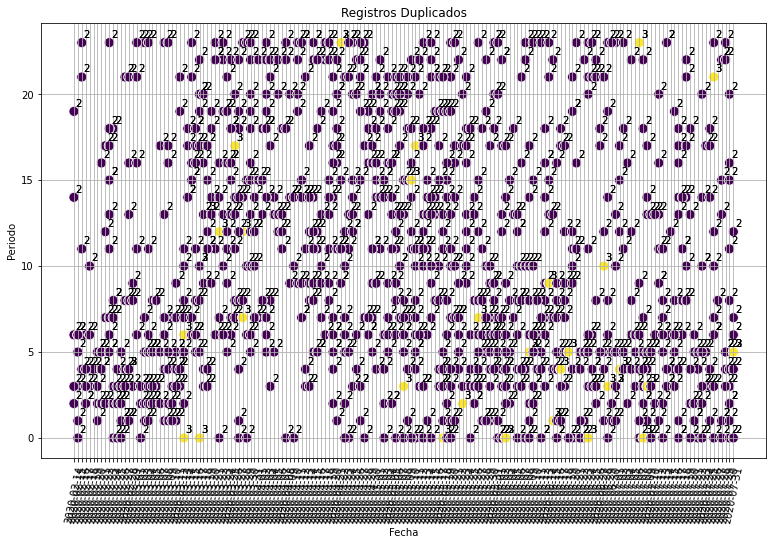

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d')

# Encontrar registros duplicados y contar el número de duplicados en cada grupo
duplicados = df[df.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False)]
print(duplicados.shape)
duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')

# Graficar los puntos de duplicados con el número de duplicados como etiquetas al lado de los puntos
plt.figure(figsize=(13, 8))
sns.scatterplot(x='fecha', y='periodo', hue='num_duplicados', size='num_duplicados', data=duplicados, palette='viridis', legend='full', sizes=(100, 100))

# Anotar los puntos con el número de duplicados al lado
for index, row in duplicados.iterrows():
    plt.annotate(str(row['num_duplicados']), (row['fecha'], row['periodo']), textcoords="offset points", xytext=(5,5), ha='center')

plt.grid(True)    
plt.title('Registros Duplicados')
plt.xlabel('Fecha')
plt.ylabel('Periodo')
plt.legend().set_visible(False)
unique_dates = duplicados['fecha'].unique()
plt.xticks(ticks=unique_dates, labels=[pd.to_datetime(date).strftime('%Y-%m-%d') for date in unique_dates], rotation=78)
plt.show()

# Eliminación de duplicados - 002-005

In [6]:
# basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
# data = pd.read_csv(basepath, dtype={"fecha": str,
#                                     "origen": str,
#                                     "destino": str}, sep=',') 
# df = data[['fecha','periodo','origen','destino','distancia','viajes']]

# df_dist1 = df.loc[df['distancia'] == '002-005'] 
# df_dist1['fecha'] = pd.to_datetime(df_dist1['fecha'], format='%Y%m%d')

In [7]:
# # Encontrar registros duplicados y contar el número de duplicados en cada grupo
# duplicados = df_dist1[df_dist1.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False)]
# duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')

# # Graficar los puntos de duplicados con el número de duplicados como etiquetas al lado de los puntos
# plt.figure(figsize=(13, 8))
# sns.scatterplot(x='fecha', y='periodo', hue='num_duplicados', size='num_duplicados', data=duplicados, palette='viridis', legend='full', sizes=(100, 100))

# # Anotar los puntos con el número de duplicados al lado
# for index, row in duplicados.iterrows():
#     plt.annotate(str(row['num_duplicados']), (row['fecha'], row['periodo']), textcoords="offset points", xytext=(5,5), ha='center')

# plt.grid(True)
# plt.title('Grupos de Duplicados')
# plt.xlabel('Fecha')
# plt.ylabel('Periodo')
# plt.legend().set_visible(False)

# unique_dates = duplicados['fecha'].unique()
# plt.xticks(ticks=unique_dates, labels=[pd.to_datetime(date).strftime('%Y-%m-%d') for date in unique_dates], rotation=78)

# plt.show()

# Eliminación de duplicados - 005-010

In [8]:
# basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
# data = pd.read_csv(basepath, dtype={"fecha": str,
#                                     "origen": str,
#                                     "destino": str}, sep=',') 
# df = data[['fecha','periodo','origen','destino','distancia','viajes']]

# df_dist2 = df.loc[df['distancia'] == '005-010'] 
# df_dist2['fecha'] = pd.to_datetime(df_dist2['fecha'], format='%Y%m%d')

In [9]:
# # Encontrar registros duplicados y contar el número de duplicados en cada grupo
# duplicados = df_dist2[df_dist2.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False)]
# # duplicados['num_duplicados'] = duplicados.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False).groupby(duplicados['fecha']).transform('sum')
# duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')


# # Graficar los puntos de duplicados con el número de duplicados como etiquetas al lado de los puntos
# plt.figure(figsize=(13, 8))
# sns.scatterplot(x='fecha', y='periodo', hue='num_duplicados', size='num_duplicados', data=duplicados, palette='viridis', legend='full', sizes=(100, 100))

# # Anotar los puntos con el número de duplicados al lado
# for index, row in duplicados.iterrows():
#     plt.annotate(str(row['num_duplicados']), (row['fecha'], row['periodo']), textcoords="offset points", xytext=(5,5), ha='center')

# plt.grid(True)
# plt.title('Grupos de Duplicados')
# plt.xlabel('Fecha')
# plt.ylabel('Periodo')
# plt.legend().set_visible(False)

# unique_dates = duplicados['fecha'].unique()
# plt.xticks(ticks=unique_dates, labels=[pd.to_datetime(date).strftime('%Y-%m-%d') for date in unique_dates], rotation=78)
# plt.show()

# Limpiamos duplicados

In [10]:
############### Prueba de escritorio ###################
##duplicados de 2 => 2223 - 93 = 2130
##sin duplicados de 2 = 1065
##duplicados de 3 => 93
##sin duplicados de 3 => 93 / 3 = 31
####### df duplicados limpio => 1065 + 31 = 1096 ############
####### ¿Cuantos elimine? => 2223 - 1096 = 1127 ########
####### df limpio => 42073 - 1127 = 40946 ############

In [11]:
datos_sin_duplicados = df.drop_duplicates(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep='first')
datos_sin_duplicados.shape

(41677, 6)

In [13]:
datos_sin_duplicados.to_csv('trayectoFeb_Jul_limpio.csv', index=False)